#### Import libraries

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 2. Grouping songs together!

### 2.1. Getting your data!

First of all, let's load the three different datasets and have a look at each of them to see what we are working with. We will also look at some basic information:
- shape (number of rows and columns)
- name of the columns

In [2]:
tracks = pd.read_csv('tracks.csv')
features = pd.read_csv('features.csv')
echonest = pd.read_csv('echonest.csv')

##### 1) 'tracks.csv'

In [3]:
tracks.head()

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,...,track_information,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title
0,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
1,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
2,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
3,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,...,NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
4,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,...,NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level


In [ ]:
tracks.shape

(106574, 53)

In [23]:
tracks.columns

Index(['track_id', 'album_comments', 'album_date_created',
       'album_date_released', 'album_engineer', 'album_favorites', 'album_id',
       'album_information', 'album_listens', 'album_producer', 'album_tags',
       'album_title', 'album_tracks', 'album_type', 'artist_active_year_begin',
       'artist_active_year_end', 'artist_associated_labels', 'artist_bio',
       'artist_comments', 'artist_date_created', 'artist_favorites',
       'artist_id', 'artist_latitude', 'artist_location', 'artist_longitude',
       'artist_members', 'artist_name', 'artist_related_projects',
       'artist_tags', 'artist_website', 'artist_wikipedia_page', 'set_split',
       'set_subset', 'track_bit_rate', 'track_comments', 'track_composer',
       'track_date_created', 'track_date_recorded', 'track_duration',
       'track_favorites', 'track_genre_top', 'track_genres',
       'track_genres_all', 'track_information', 'track_interest',
       'track_language_code', 'track_license', 'track_listens',
  

##### 2) 'features.csv'

In [7]:
features.head()

,track_id,chroma_cens_kurtosis_01,chroma_cens_kurtosis_02,chroma_cens_kurtosis_03,chroma_cens_kurtosis_04,chroma_cens_kurtosis_05,chroma_cens_kurtosis_06,chroma_cens_kurtosis_07,chroma_cens_kurtosis_08,chroma_cens_kurtosis_09,...,tonnetz_std_04,tonnetz_std_05,tonnetz_std_06,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01
0,2,7.180653,5.230309,0.249321,1.347620,1.482478,0.531371,1.481593,2.691455,0.866868,...,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448
1,3,1.888963,0.760539,0.345297,2.295201,1.654031,0.067592,1.366848,1.054094,0.108103,...,0.063831,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.000000,1.716724,0.069330
2,5,0.527563,-0.077654,-0.279610,0.685883,1.937570,0.880839,-0.923192,-0.927232,0.666617,...,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861
3,10,3.702245,-0.291193,2.196742,-0.234449,1.367364,0.998411,1.770694,1.604566,0.521217,...,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800
4,20,-0.193837,-0.198527,0.201546,0.258556,0.775204,0.084794,-0.289294,-0.816410,0.043851,...,0.095003,0.022492,0.021355,16.669037,0.469727,0.047225,0.040039,0.000977,3.189831,0.030993


In [24]:
features.shape

(106574, 519)

In [25]:
features.columns

Index(['track_id', 'chroma_cens_kurtosis_01', 'chroma_cens_kurtosis_02',
       'chroma_cens_kurtosis_03', 'chroma_cens_kurtosis_04',
       'chroma_cens_kurtosis_05', 'chroma_cens_kurtosis_06',
       'chroma_cens_kurtosis_07', 'chroma_cens_kurtosis_08',
       'chroma_cens_kurtosis_09',
       ...
       'tonnetz_std_04', 'tonnetz_std_05', 'tonnetz_std_06', 'zcr_kurtosis_01',
       'zcr_max_01', 'zcr_mean_01', 'zcr_median_01', 'zcr_min_01',
       'zcr_skew_01', 'zcr_std_01'],
      dtype='object', length=519)

##### 3) 'echonest.csv'

In [10]:
echonest.head()

,track_id,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo,audio_features_valence,metadata_album_date,...,temporal_features_214,temporal_features_215,temporal_features_216,temporal_features_217,temporal_features_218,temporal_features_219,temporal_features_220,temporal_features_221,temporal_features_222,temporal_features_223
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,NaN,...,-1.992303,6.805694,0.233070,0.192880,0.027455,0.06408,3.67696,3.61288,13.316690,262.929749
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,NaN,...,-1.582331,8.889308,0.258464,0.220905,0.081368,0.06413,6.08277,6.01864,16.673548,325.581085
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,NaN,...,-2.288358,11.527109,0.256821,0.237820,0.060122,0.06014,5.92649,5.86635,16.013849,356.755737
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,2008-03-11,...,-3.662988,21.508228,0.283352,0.267070,0.125704,0.08082,8.41401,8.33319,21.317064,483.403809
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,NaN,...,-1.452696,2.356398,0.234686,0.199550,0.149332,0.06440,11.26707,11.20267,26.454180,751.147705


In [9]:
echonest.shape

(13129, 250)

In [11]:
echonest.columns

Index(['track_id', 'audio_features_acousticness',
       'audio_features_danceability', 'audio_features_energy',
       'audio_features_instrumentalness', 'audio_features_liveness',
       'audio_features_speechiness', 'audio_features_tempo',
       'audio_features_valence', 'metadata_album_date',
       ...
       'temporal_features_214', 'temporal_features_215',
       'temporal_features_216', 'temporal_features_217',
       'temporal_features_218', 'temporal_features_219',
       'temporal_features_220', 'temporal_features_221',
       'temporal_features_222', 'temporal_features_223'],
      dtype='object', length=250)

##### Merging

The datasets vary in shape and column names, but we see that all three of them share a column with the same name: the 'track_id' column, which seems to associate each track to a specific integer.
<br>
To merge the three datasets together, we will keep only the tracks that are in the 'echonest.csv' file, since this is the dataset with the smallest number of rows (13129 vs 106574 of the other two datasets). If we were to keep all the tracks in the other two datasets, a huge number of them would have missing values for the columns featured in the 'echonest' dataset. By doing this instead, we'd expect to have a dataset that is as complete as possible.
<br>
The reasonable choice, then, is to merge the datasets along the 'track_id' column, which is therefore being identified as the key to read different information accross the dataset for the same track. We will do this in two steps:
- first, we merge 'echonest.csv' with 'tracks.csv'
- then we merge the resulting dataset with 'features.csv'.

To check if the datasets merged in the way we wanted, we shall check their shape: the final dataset should have the same number of rows of 'echonest.csv' and a number of columns equal to the sum of all three datasets -2 (since we are not counting the 'track_id' column from 'tracks.csv' and 'features.csv').

In [3]:
step1 = echonest.merge(tracks, on = 'track_id')

In [4]:
merged = step1.merge(features, on = 'track_id')

In [5]:
merged

,track_id,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo,audio_features_valence,metadata_album_date,...,tonnetz_std_04,tonnetz_std_05,tonnetz_std_06,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,NaN,...,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,NaN,...,0.063831,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.000000,1.716724,0.069330
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,NaN,...,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,2008-03-11,...,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,NaN,...,0.058766,0.016322,0.015819,4.731087,0.419434,0.064370,0.050781,0.000000,1.806106,0.054623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13124,124857,0.007592,0.790364,0.719288,0.853114,0.720715,0.082550,141.332,0.890461,NaN,...,0.044130,0.017932,0.019123,11.869940,0.405273,0.049399,0.038086,0.000000,2.820800,0.042830
13125,124862,0.041498,0.843077,0.536496,0.865151,0.547949,0.074001,101.975,0.476845,NaN,...,0.050790,0.019464,0.014612,4.255357,0.298828,0.040642,0.025391,0.000000,1.789954,0.040908
13126,124863,0.000124,0.609686,0.895136,0.846624,0.632903,0.051517,129.996,0.496667,NaN,...,0.044322,0.018616,0.017603,7.419688,0.344727,0.047787,0.041504,0.001953,1.961021,0.035228
13127,124864,0.327576,0.574426,0.548327,0.452867,0.075928,0.033388,142.009,0.569274,NaN,...,0.097448,0.020286,0.020809,5.421509,0.283691,0.049346,0.040039,0.000000,1.949840,0.035900


In [7]:
n_cols = (echonest.shape[1] + tracks.shape[1] + features.shape[1]) - 2
n_rows = echonest.shape[0]
print(f"The desired shape is: ({n_rows}, {n_cols}).")
print(f"The actual shape is: {merged.shape}.")

The desired shape is: (13129, 820).
The actual shape is: (13129, 820).


### 2.2. Choose your features!

First of all, let's have a look at the data types we are dealing with.

In [7]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 0 to 13128
Columns: 820 entries, track_id to zcr_std_01
dtypes: float64(764), int64(16), object(40)
memory usage: 82.2+ MB


As we see, the majority of our data consists of numeric values (floats and integers), while a small part is given by strings or mixed data types. Given the huge importance of numeric values over categorical ones, to achieve the dimensionality reduction we will perform <b>Principal Component Analysis</b> on these features.
Still, some of the categorical values will also have an importance later, so we will choose the most relevant variables between them and stack them with the reduced dataset resulting of the PCA procedure. In order to keep things tidier, we are also going to drop columns that contain missing values.
Before performing the dimensinality reduction, we need to normalize our data. By looking at the column names coming from 'tracks.csv', we have found three variables that we don't want to scale, as they give us precise information on how to identify the track and the corresponding album and artist. As we are going to do with relevant categorical variables, we are going to set these columns aside and add them back later on, once the dimensionality reduction process is over.

In [12]:
# keeping only columns with numeric values
only_num = merged.select_dtypes(include=np.number)
# dropping NaN values
only_num = only_num.dropna(axis = 1, how='any')
# dropping columns we don't want to scale
to_drop = ['track_id', 'album_id', 'artist_id']
only_num = only_num.drop(to_drop, axis=1)
# have a look 
only_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 0 to 13128
Columns: 768 entries, audio_features_acousticness to zcr_std_01
dtypes: float64(755), int64(13)
memory usage: 77.0 MB


In [13]:
# initialize scaler
scaler = StandardScaler()
# scale and restore processed data in a dataframe with the same columns
scaled_data = scaler.fit_transform(only_num.values)
scaled_df = pd.DataFrame(scaled_data, columns = only_num.columns)
scaled_df.head()

,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo,audio_features_valence,social_features_artist_discovery,social_features_artist_familiarity,...,tonnetz_std_04,tonnetz_std_05,tonnetz_std_06,zcr_kurtosis_01,zcr_max_01,zcr_mean_01,zcr_median_01,zcr_min_01,zcr_skew_01,zcr_std_01
0,-0.281499,0.991915,0.348732,-1.742887,-0.064267,0.437749,1.223573,0.495983,0.584512,0.782963,...,-1.310092,-1.564443,-1.654377,-0.381721,0.393540,1.208676,1.035766,-0.594301,-0.378710,0.932033
1,-0.391656,0.217484,1.006860,-1.767172,-0.518358,2.639805,0.110726,-0.617788,0.584512,0.782963,...,-1.021250,-1.202410,-0.608422,-0.439876,0.432798,1.168234,0.742018,-0.594301,-0.526657,1.267315
2,-1.253885,1.358338,0.589683,-1.770366,1.172705,0.185049,-0.651745,0.659017,0.584512,0.782963,...,-1.708717,-1.479675,-1.162289,-0.360920,-0.091584,-0.042573,-0.158812,-0.594301,-0.337701,0.226443
3,1.112791,0.898745,1.391929,0.898939,-0.457654,-0.481812,-0.328958,1.897809,2.053342,2.556413,...,-0.707981,-0.520648,-1.317931,-0.071044,0.351477,0.896399,1.055350,-0.594301,0.197164,0.053735
4,-0.188870,0.136465,0.082343,-1.718498,-0.577286,3.103507,-0.251046,1.645950,0.584512,0.782963,...,-1.171979,-0.817691,-0.965264,-0.402092,0.163596,0.390558,0.213270,-0.594301,-0.491219,0.641704


In [17]:
# performing PCA
pca = PCA(n_components=70)
components = pca.fit_transform(scaled_df.values)
PCA_df = pd.DataFrame(data = components, columns = [x for x in range(1,71)])
PCA_df.head()

,1,2,3,4,5,6,7,8,9,10,...,61,62,63,64,65,66,67,68,69,70
0,3.073380,-2.813784,-5.723231,4.298900,3.143576,2.044949,6.773870,-0.910138,-2.228267,4.279327,...,2.207243,0.632183,0.937392,0.054092,-0.206946,-0.416731,-0.040665,-0.278380,-0.878780,-1.226877
1,5.774619,-5.410043,-5.293710,-1.575243,-3.638760,2.656023,-1.533235,5.904929,-0.147311,4.190938,...,0.395375,-0.533150,1.126272,-0.397617,-1.330502,-0.711264,1.097594,-0.446176,0.955268,0.829933
2,2.651468,-4.167767,-4.566703,-0.037030,-2.853624,2.101069,-1.273032,-0.324174,-0.105284,1.758414,...,-0.148910,-1.000990,1.454043,-1.746179,0.812745,-0.123508,0.042534,-0.595457,-1.336005,0.799468
3,9.102106,3.791647,-5.511918,0.780154,-1.354686,0.609045,-1.804490,4.104999,-0.539536,4.886375,...,2.478303,1.015836,-0.079181,0.414534,-1.935175,-0.492418,2.782160,3.006357,0.808238,2.067948
4,1.307770,-9.453891,-4.280977,0.735417,-3.824223,-1.230764,-2.935264,-2.200753,-0.516419,2.519044,...,0.713631,-2.540224,3.234127,-0.522764,0.016190,-0.988082,0.642284,-1.669050,-0.944403,-0.613756


Let's check the percentage of retained variance after the dimensionality reduction and plot it against the number of components of our model to check the impact of adding more components to our results.

In [19]:
retained_variance = round(sum(pca.explained_variance_ratio_),2)*100
print(f"{retained_variance} % of the total variance was retained after the dimensionality reduction.")

71.0 % of the total variance was retained after the dimensionality reduction.


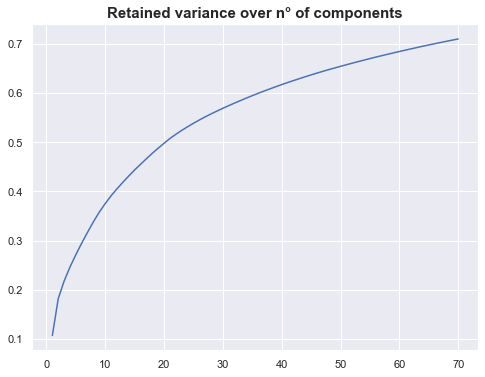

In [20]:
sns.set(rc={'figure.figsize':(8,6)})
ax = sns.lineplot(x=PCA_df.columns,
                 y=np.cumsum(pca.explained_variance_ratio_))
_ = plt.title('Retained variance over n° of components',fontweight="bold", fontsize=15)

In [21]:
pd.concat((merged[to_drop],PCA_df), axis=1)

,track_id,album_id,artist_id,1,2,3,4,5,6,7,...,61,62,63,64,65,66,67,68,69,70
0,2,1,1,3.073380,-2.813784,-5.723231,4.298900,3.143576,2.044949,6.773870,...,2.207243,0.632183,0.937392,0.054092,-0.206946,-0.416731,-0.040665,-0.278380,-0.878780,-1.226877
1,3,1,1,5.774619,-5.410043,-5.293710,-1.575243,-3.638760,2.656023,-1.533235,...,0.395375,-0.533150,1.126272,-0.397617,-1.330502,-0.711264,1.097594,-0.446176,0.955268,0.829933
2,5,1,1,2.651468,-4.167767,-4.566703,-0.037030,-2.853624,2.101069,-1.273032,...,-0.148910,-1.000990,1.454043,-1.746179,0.812745,-0.123508,0.042534,-0.595457,-1.336005,0.799468
3,10,6,6,9.102106,3.791647,-5.511918,0.780154,-1.354686,0.609045,-1.804490,...,2.478303,1.015836,-0.079181,0.414534,-1.935175,-0.492418,2.782160,3.006357,0.808238,2.067948
4,134,1,1,1.307770,-9.453891,-4.280977,0.735417,-3.824223,-1.230764,-2.935264,...,0.713631,-2.540224,3.234127,-0.522764,0.016190,-0.988082,0.642284,-1.669050,-0.944403,-0.613756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13124,124857,18862,20818,7.730534,-5.715856,-1.124011,-1.537548,-2.128173,-0.000006,1.269716,...,0.021942,1.243181,-0.546399,-0.136488,-1.173973,0.838243,-0.348723,0.211238,0.653986,0.871044
13125,124862,18862,20818,15.124492,-5.129207,-1.366282,11.646397,-1.473650,-0.926450,-1.334122,...,-3.464889,-2.926371,0.110008,-0.612517,-0.170585,-1.347912,-0.005861,0.175219,2.169821,0.645580
13126,124863,18862,20818,18.033730,-3.882939,-1.727405,5.005397,-2.398247,3.116071,4.650195,...,-0.354196,-1.547279,0.017146,-1.208205,0.265671,-0.973732,0.271781,-0.404428,0.767410,-0.093015
13127,124864,18862,20818,-2.903979,-1.686992,-0.399575,-6.070813,-1.493951,-0.280862,3.314131,...,-1.187978,0.611314,-0.290765,0.033662,0.811446,0.136611,0.706871,0.506018,0.140975,0.351495


### 2.3. Clustering!

### 2.4. Analysing your results!